# How to use an API + API Test Notebook

In [2]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json
import os 

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest' 
#Original Sandbox Environment: 'https://sandbox-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'15',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': '0ad53085-1cb2-4eb8-ad9e-3ffbd7e56509',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  #print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)

#NOTE:
# I had to go in and put "jupyter notebook --NotebookApp.iopub_data_rate_limit=1e10"
# Into the Anaconda Prompt to change this to allow to pull data

# If that didn't work try using the local host URL as shown in the video

In [3]:
type(data)

dict

In [4]:
import pandas as pd 

# This allows you to see all the columns, not just like 15
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [5]:
# This normalizes the data and makes it all pretty in a dataframe

df = pd.json_normalize(data['data'])
df['timestamp'] = pd.to_datetime('now')
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,12261,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.989411e+07,1.989411e+07,False,NaN,1,NaN,NaN,None,2025-07-18T19:14:00.000Z,117423.957294,8.152644e+10,19.0902,-0.021521,-2.054637,-0.293566,12.485189,11.946447,37.893785,2.336045e+12,60.9217,2.465903e+12,None,2025-07-18T19:14:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-07-18 15:15:01.138297
1,1027,Ethereum,ETH,ethereum,10401,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.207126e+08,1.207126e+08,True,NaN,2,NaN,NaN,None,2025-07-18T19:14:00.000Z,3553.915800,6.230020e+10,36.1135,-0.895994,3.215462,18.617995,41.758794,42.543470,119.787744,4.290025e+11,11.1844,4.290025e+11,None,2025-07-18T19:14:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-07-18 15:15:01.138297
2,52,XRP,XRP,xrp,1653,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, xrp...",1.000000e+11,5.918219e+10,9.998593e+10,False,NaN,3,NaN,NaN,None,2025-07-18T19:14:00.000Z,3.418745,2.237166e+10,46.6712,-0.469264,1.780590,21.602682,59.444724,44.084078,63.695325,2.023288e+11,5.2765,3.418745e+11,None,2025-07-18T19:14:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-07-18 15:15:01.138297
3,825,Tether USDt,USDT,tether,137549,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, usd-stab...",NaN,1.608190e+11,1.648173e+11,True,NaN,4,NaN,NaN,None,2025-07-18T19:13:00.000Z,1.000393,1.780849e+11,26.9451,-0.003187,-0.007759,0.026695,0.038438,0.021020,0.052272,1.608822e+11,4.1956,1.648820e+11,None,2025-07-18T19:13:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2025-07-18 15:15:01.138297
4,1839,BNB,BNB,bnb,2627,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.392890e+08,1.392890e+08,False,NaN,5,NaN,NaN,None,2025-07-18T19:14:00.000Z,732.242490,3.333622e+09,14.3192,-1.026698,1.659069,5.508919,14.427232,13.180318,23.937966,1.019934e+11,2.6599,1.019934e+11,None,2025-07-18T19:14:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-07-18 15:15:01.138297
5,5426,Solana,SOL,solana,954,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,5.378027e+08,6.054630e+08,True,NaN,6,5.252369e+08,9.296287e+10,None,2025-07-18T19:14:00.000Z,176.992273,8.883030e+09,13.3021,-0.569122,1.053351,8.060059,22.220255,7.201038,27.744069,9.518692e+10,2.4824,1.071623e+11,None,2025-07-18T19:14:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-07-18 15:15:01.138297
6,3408,USDC,USDC,usd-coin,29593,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,6.459883e+10,6.459883e+10,False,NaN,7,6.090122e+10,6.089057e+10,None,2025-07-18T19:14:00.000Z,0.999825,2.871421e+10,46.5386,-0.008256,-0.011369,-0.010221,-0.041761,-0.002813,-0.009289,6.458754e+10,1.6844,6.458754e+10,None,2025-07-18T19:14:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2025-07-18 15:15:01.138297
7,74,Dogecoin,DOGE,dogecoin,1258,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,1.501502e+11,1.501502e+11,True,NaN,8,NaN,NaN,None,2025-07-18T19:14:00.000Z,0.232750,6.911584e+09,91.5459,-1.729542,8.317363,10.743695,39.203481,4.468770,47.905840,3.494751e+10,0.9114,3.494751e+10,None,2025-07-18T19:14:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-07-18 15:15:01.138297
8,1958,TRON,TRX,tron,1202,2017-09-13T00:00:00.000Z,"[media, payments, tron-ecosystem

In [ ]:
def api_runner():
    global df
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest' 
    #Original Sandbox Environment: 'https://sandbox-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
      'start':'1',
      'limit':'15',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': '0ad53085-1cb2-4eb8-ad9e-3ffbd7e56509',
    }

    session = Session()
    session.headers.update(headers)

    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
      #print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)

#NOTE:
# I had to go in and put "jupyter notebook --NotebookApp.iopub_data_rate_limit=1e10"
# Into the Anaconda Prompt to change this to allow to pull data
    
    # Use this if you just want to keep it in a dataframe
    df2 = pd.json_normalize(data['data'])
    df2['timestamp'] = pd.to_datetime('now')
    df = pd.concat([df, df2], ignore_index=True)
    # df = df.append(df2) # this was removed from python

    # Use this if you want to create a csv and append data to it
    #df = pd.json_normalize(data['data'])
    #df['timestamp'] = pd.to_datetime('now')
    #df

    #if not os.path.isfile(r'D:\GitHub\important-reference-repo\Data\data_analyst_bootcamp_proj2_API.csv'):
        #df.to_csv(r'D:\GitHub\important-reference-repo\Data\data_analyst_bootcamp_proj2_API.csv', header='column_names')
    #else:
        #df.to_csv(r'D:\GitHub\important-reference-repo\Data\data_analyst_bootcamp_proj2_API.csv', mode='a', header=False)
        
    #Then to read in the file: df = pd.read_csv(r'D:\GitHub\important-reference-repo\Data\data_analyst_bootcamp_proj2_API.csv')

# If that didn't work try using the local host URL as shown in the video

In [7]:
import os 
from time import time
from time import sleep

for i in range(333):
    api_runner()
    print('API Runner completed')
    sleep(60) #sleep for 1 minute
exit()

API Runner completed
API Runner completed


KeyboardInterrupt: 

In [12]:
df3 = pd.read_csv(r'D:\GitHub\important-reference-repo\Data\data_analyst_bootcamp_proj2_API.csv')
df3

,Unnamed: 0,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,0,1,Bitcoin,BTC,bitcoin,12261,2010-07-13T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",21000000.00000,19894109.00000,19894109.00000,False,NaN,1,NaN,NaN,NaN,2025-07-18T19:13:00.000Z,117420.62372,81458409877.85097,18.80700,-0.00123,-2.06199,-0.25884,12.61184,11.93849,37.87576,2335978687166.58594,60.92000,2465833098154.75000,NaN,2025-07-18T19:13:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-07-18 15:13:38.497193
1,1,1027,Ethereum,ETH,ethereum,10401,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,120712631.23610,120712631.23610,True,NaN,2,NaN,NaN,NaN,2025-07-18T19:13:00.000Z,3551.75148,61154165243.82813,33.28480,-0.96729,3.20380,18.60433,41.95096,42.44806,119.60482,428741266723.62793,11.17760,428741266723.63000,NaN,2025-07-18T19:13:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-07-18 15:13:38.497193
2,2,52,XRP,XRP,xrp,1653,2013-08-04T00:00:00.000Z,"['medium-of-exchange', 'enterprise-solutions',...",100000000000.00000,59182189917.00000,99985925712.00000,False,NaN,3,NaN,NaN,NaN,2025-07-18T19:13:00.000Z,3.41748,22374885473.63153,46.73450,-0.47309,1.74534,21.62078,59.55770,44.03014,63.63222,202254239057.15863,5.27460,341748487747.42999,NaN,2025-07-18T19:13:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-07-18 15:13:38.497193
3,3,825,Tether USDt,USDT,tether,137548,2015-02-25T00:00:00.000Z,"['stablecoin', 'asset-backed-stablecoin', 'usd...",NaN,160819014810.71643,164817298722.08054,True,NaN,4,NaN,NaN,NaN,2025-07-18T19:12:00.000Z,1.00065,178057725887.59534,26.00730,0.01937,0.01104,0.07530,0.00689,0.05976,0.07702,160923066944.70551,4.19670,164923937801.23999,NaN,2025-07-18T19:12:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2025-07-18 15:13:38.497193
4,4,1839,BNB,BNB,bnb,2627,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",NaN,139289043.87000,139289043.87000,False,NaN,5,NaN,NaN,NaN,2025-07-18T19:13:00.000Z,732.14804,3333258706.45066,14.28950,-1.04139,1.64800,5.49741,14.48334,13.17565,23.92069,101980200136.36958,2.65950,101980200136.37000,NaN,2025-07-18T19:13:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-07-18 15:13:38.497193
5,5,5426,Solana,SOL,solana,954,2020-04-10T00:00:00.000Z,"['pos', 'platform', 'solana-ecosystem', 'cms-h...",NaN,537802685.22243,605462976.68205,True,NaN,6,525236893.30000,92942265488.75218,NaN,2025-07-18T19:13:00.000Z,176.95304,8880909378.72040,13.24650,-0.58479,1.03451,8.04008,22.49801,7.19073,27.71239,95165820581.37531,2.48180,107138514906.74001,NaN,2025-07-18T19:13:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-07-18 15:13:38.497193
6,6,3408,USDC,USDC,usd-coin,29593,2018-10-08T00:00:00.000Z,"['medium-of-exchange', 'stablecoin', 'asset-ba...",NaN,64598832311.09972,64598832311.09972,False,NaN,7,60901219650.23000,60891289365.15758,NaN,2025-07-18T19:13:00.000Z,0.99984,28718422764.40863,46.45600,-0.00971,-0.00551,0.00015,-0.01480,-0.00444,-0.00703,64588299109.56650,1.68440,64588299109.57000,NaN,2025-07-18T19:13:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2025-07-18 15:13:38.497193
7,7,74,Dogecoin,DOGE,dogecoin,1258,2013-12-15T00:00:00.000Z,"['mineable', 'pow', 'scrypt', 'medium-of-excha...",NaN,150150176383.70523,150150176383.70523,True,NaN,8,NaN,NaN,NaN,2025-07-18T19:13:00.000Z,0.23264,6910425039.08357,91.44630,-1.84540,8.27626,10.72123,39.39359,4.43236,47.82445,34931

In [13]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)
df3

,Unnamed: 0,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,0,1,Bitcoin,BTC,bitcoin,12261,2010-07-13T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",21000000.00000,19894109.00000,19894109.00000,False,NaN,1,NaN,NaN,NaN,2025-07-18T19:13:00.000Z,117420.62372,81458409877.85097,18.80700,-0.00123,-2.06199,-0.25884,12.61184,11.93849,37.87576,2335978687166.58594,60.92000,2465833098154.75000,NaN,2025-07-18T19:13:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-07-18 15:13:38.497193
1,1,1027,Ethereum,ETH,ethereum,10401,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,120712631.23610,120712631.23610,True,NaN,2,NaN,NaN,NaN,2025-07-18T19:13:00.000Z,3551.75148,61154165243.82813,33.28480,-0.96729,3.20380,18.60433,41.95096,42.44806,119.60482,428741266723.62793,11.17760,428741266723.63000,NaN,2025-07-18T19:13:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-07-18 15:13:38.497193
2,2,52,XRP,XRP,xrp,1653,2013-08-04T00:00:00.000Z,"['medium-of-exchange', 'enterprise-solutions',...",100000000000.00000,59182189917.00000,99985925712.00000,False,NaN,3,NaN,NaN,NaN,2025-07-18T19:13:00.000Z,3.41748,22374885473.63153,46.73450,-0.47309,1.74534,21.62078,59.55770,44.03014,63.63222,202254239057.15863,5.27460,341748487747.42999,NaN,2025-07-18T19:13:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-07-18 15:13:38.497193
3,3,825,Tether USDt,USDT,tether,137548,2015-02-25T00:00:00.000Z,"['stablecoin', 'asset-backed-stablecoin', 'usd...",NaN,160819014810.71643,164817298722.08054,True,NaN,4,NaN,NaN,NaN,2025-07-18T19:12:00.000Z,1.00065,178057725887.59534,26.00730,0.01937,0.01104,0.07530,0.00689,0.05976,0.07702,160923066944.70551,4.19670,164923937801.23999,NaN,2025-07-18T19:12:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2025-07-18 15:13:38.497193
4,4,1839,BNB,BNB,bnb,2627,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",NaN,139289043.87000,139289043.87000,False,NaN,5,NaN,NaN,NaN,2025-07-18T19:13:00.000Z,732.14804,3333258706.45066,14.28950,-1.04139,1.64800,5.49741,14.48334,13.17565,23.92069,101980200136.36958,2.65950,101980200136.37000,NaN,2025-07-18T19:13:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-07-18 15:13:38.497193
5,5,5426,Solana,SOL,solana,954,2020-04-10T00:00:00.000Z,"['pos', 'platform', 'solana-ecosystem', 'cms-h...",NaN,537802685.22243,605462976.68205,True,NaN,6,525236893.30000,92942265488.75218,NaN,2025-07-18T19:13:00.000Z,176.95304,8880909378.72040,13.24650,-0.58479,1.03451,8.04008,22.49801,7.19073,27.71239,95165820581.37531,2.48180,107138514906.74001,NaN,2025-07-18T19:13:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-07-18 15:13:38.497193
6,6,3408,USDC,USDC,usd-coin,29593,2018-10-08T00:00:00.000Z,"['medium-of-exchange', 'stablecoin', 'asset-ba...",NaN,64598832311.09972,64598832311.09972,False,NaN,7,60901219650.23000,60891289365.15758,NaN,2025-07-18T19:13:00.000Z,0.99984,28718422764.40863,46.45600,-0.00971,-0.00551,0.00015,-0.01480,-0.00444,-0.00703,64588299109.56650,1.68440,64588299109.57000,NaN,2025-07-18T19:13:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2025-07-18 15:13:38.497193
7,7,74,Dogecoin,DOGE,dogecoin,1258,2013-12-15T00:00:00.000Z,"['mineable', 'pow', 'scrypt', 'medium-of-excha...",NaN,150150176383.70523,150150176383.70523,True,NaN,8,NaN,NaN,NaN,2025-07-18T19:13:00.000Z,0.23264,6910425039.08357,91.44630,-1.84540,8.27626,10.72123,39.39359,4.43236,47.82445,34931

In [ ]:
df4 = df3.groupby('name', sort=False)[['quote.USD.percent_change_1h', 
                                       'quote.USD.percent_change_24h', 
                                       'quote.USD.percent_change_7d', 
                                       'quote.USD.percent_change_30d', 
                                       'quote.USD.percent_change_60d', 
                                       'quote.USD.percent_change_90d']].mean()

In [15]:
df5 = df4.stack()
df5

name                                     
Bitcoin      quote.USD.percent_change_1h     -0.01340
             quote.USD.percent_change_24h    -2.05758
             quote.USD.percent_change_7d     -0.27968
             quote.USD.percent_change_30d    12.53585
             quote.USD.percent_change_60d    11.94326
             quote.USD.percent_change_90d    37.88657
Ethereum     quote.USD.percent_change_1h     -0.92451
             quote.USD.percent_change_24h     3.21080
             quote.USD.percent_change_7d     18.61253
             quote.USD.percent_change_30d    41.83566
             quote.USD.percent_change_60d    42.50531
             quote.USD.percent_change_90d   119.71457
XRP          quote.USD.percent_change_1h     -0.47191
             quote.USD.percent_change_24h     1.76353
             quote.USD.percent_change_7d     21.58291
             quote.USD.percent_change_30d    59.45647
             quote.USD.percent_change_60d    44.06004
             quote.USD.percent_change_90

In [16]:
type(df5)

pandas.core.series.Series

In [18]:
df6 = df5.to_frame(name='values')
df6

values
name                                              
Bitcoin     quote.USD.percent_change_1h   -0.01340
            quote.USD.percent_change_24h  -2.05758
            quote.USD.percent_change_7d   -0.27968
            quote.USD.percent_change_30d  12.53585
            quote.USD.percent_change_60d  11.94326
            quote.USD.percent_change_90d  37.88657
Ethereum    quote.USD.percent_change_1h   -0.92451
            quote.USD.percent_change_24h   3.21080
            quote.USD.percent_change_7d   18.61253
            quote.USD.percent_change_30d  41.83566
            quote.USD.percent_change_60d  42.50531
            quote.USD.percent_change_90d 119.71457
XRP         quote.USD.percent_change_1h   -0.47191
            quote.USD.percent_change_24h   1.76353
            quote.USD.percent_change_7d   21.58291
            quote.USD.percent_change_30d  59.45647
            quote.USD.percent_change_60d  44.06004
            quote.USD.percent_change_90d  63.66965
Tether USDt quote.USD.percent_change_1h    0.00597
            quote.USD.percent_change_24h  -0.00072
            quote.USD.percent_change_7d    0.04453
            quote.USD.percent_change_30d   0.02108
            quote.USD.percent_change_60d   0.03688
            quote.USD.percent_change_90d   0.06201
BNB         quote.USD.percent_change_1h   -1.03395
            quote.USD.percent_change_24h   1.65261
            quote.USD.percent_change_7d    5.49999
            quote.USD.percent_change_30d  14.43762
            quote.USD.percent_change_60d  13.17570
            quote.USD.percent_change_90d  23.92971
Solana      quote.USD.percent_change_1h   -0.57539
            quote.USD.percent_change_24h   1.04582
            quote.USD.percent_change_7d    8.05207
            quote.USD.percent_change_30d  22.33136
            quote.USD.percent_change_60d   7.19691
            quote.USD.percent_change_90d  27.73140
USDC        quote.USD.percent_change_1h   -0.00884
            quote.USD.percent_change_24h  -0.00902
            quote.USD.percent_change_7d   -0.00607
            quote.USD.percent_change_30d  -0.03098
            quote.USD.percent_change_60d  -0.00346
            quote.USD.percent_change_90d  -0.00838
Dogecoin    quote.USD.percent_change_1h   -1.77916
            quote.USD.percent_change_24h   8.29492
            quote.USD.percent_change_7d   10.71153
            quote.USD.percent_change_30d  39.21841
            quote.USD.percent_change_60d   4.45017
            quote.USD.percent_change_90d  47.87322
TRON        quote.USD.percent_change_1h   -0.56080
            quote.USD.percent_change_24h   2.10296
            quote.USD.percent_change_7d    7.31216
            quote.USD.percent_change_30d  19.51109
            quote.USD.percent_change_60d  22.56075
            quote.USD.percent_change_90d  33.99531
Cardano     quote.USD.percent_change_1h   -1.44739
            quote.USD.percent_change_24h   0.09349
            quote.USD.percent_change_7d   10.65792
            quote.USD.percent_change_30d  37.16945
            quote.USD.percent_change_60d  10.68533
            quote.USD.percent_change_90d  29.95445
Hyperliquid quote.USD.percent_change_1h   -1.69242
            quote.USD.percent_change_24h  -6.35206
            quote.USD.percent_change_7d   -6.02140
            quote.USD.percent_change_30d  13.47869
            quote.USD.percent_change_60d  67.48484
            quote.USD.percent_change_90d 144.15779
Stellar     quote.USD.percent_change_1h   -1.15498
            quote.USD.percent_change_24h  -2.68600
            quote.USD.percent_change_7d   24.53189
            quote.USD.percent_change_30d  87.07852
            quote.USD.percent_change_60d  63.57512
            quote.USD.percent_change_90d  88.25312
Sui         quote.USD.percent_change_1h   -1.75309
            quote.USD.percent_change_24h  -5.95126
            quote.USD.percent_change_7d    9.57988
            quote.USD.percent_change_30d  36.55676
            quote.USD.percent_change_60d   1.26901
            quo

In [20]:
type(df6)
df6.count()

values    90
dtype: int64

In [21]:
index = pd.Index(range(90))

df7 = df6.reset_index()
df7

,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,-0.01340
1,Bitcoin,quote.USD.percent_change_24h,-2.05758
2,Bitcoin,quote.USD.percent_change_7d,-0.27968
3,Bitcoin,quote.USD.percent_change_30d,12.53585
4,Bitcoin,quote.USD.percent_change_60d,11.94326
5,Bitcoin,quote.USD.percent_change_90d,37.88657
6,Ethereum,quote.USD.percent_change_1h,-0.92451
7,Ethereum,quote.USD.percent_change_24h,3.21080
8,Ethereum,quote.USD.percent_change_7d,18.61253
9,Ethereum,quote.USD.percent_change_30d,41.83566


In [24]:
df8 = df7.rename(columns={'level_1': 'percent_change'})
df8

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,-0.01340
1,Bitcoin,quote.USD.percent_change_24h,-2.05758
2,Bitcoin,quote.USD.percent_change_7d,-0.27968
3,Bitcoin,quote.USD.percent_change_30d,12.53585
4,Bitcoin,quote.USD.percent_change_60d,11.94326
5,Bitcoin,quote.USD.percent_change_90d,37.88657
6,Ethereum,quote.USD.percent_change_1h,-0.92451
7,Ethereum,quote.USD.percent_change_24h,3.21080
8,Ethereum,quote.USD.percent_change_7d,18.61253
9,Ethereum,quote.USD.percent_change_30d,41.83566


In [29]:
df8['percent_change'] = df8['percent_change'].replace(['quote.USD.percent_change_1h'],['1h'])
df8['percent_change'] = df8['percent_change'].replace(['quote.USD.percent_change_24h'],['24h'])
df8['percent_change'] = df8['percent_change'].replace(['quote.USD.percent_change_7d'],['7d'])
df8['percent_change'] = df8['percent_change'].replace(['quote.USD.percent_change_30d'],['30d'])
df8['percent_change'] = df8['percent_change'].replace(['quote.USD.percent_change_60d'],['60d'])
df8['percent_change'] = df8['percent_change'].replace(['quote.USD.percent_change_90d'],['90d'])

In [30]:
import seaborn as sns 
import matplotlib.pyplot as plt

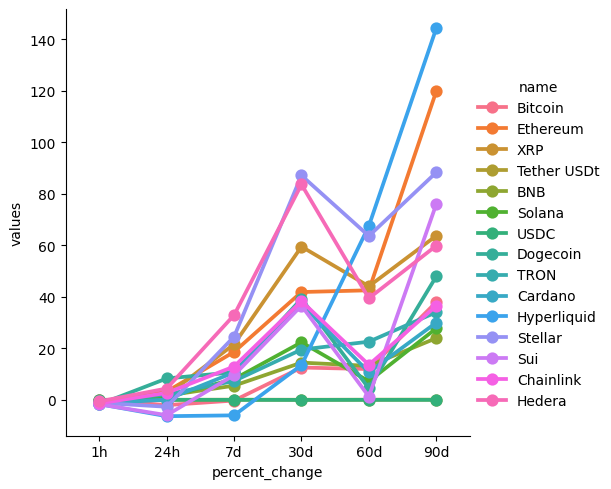

In [31]:
sns.catplot(x='percent_change', y='values', hue='name', data=df8, kind='point')

In [32]:
df9 = df[['name', 'quote.USD.price', 'timestamp']]
df9.query("name == 'Bitcoin'")
df9

,name,quote.USD.price,timestamp
0,Bitcoin,117423.95729,2025-07-18 15:15:01.138297
1,Ethereum,3553.91580,2025-07-18 15:15:01.138297
2,XRP,3.41874,2025-07-18 15:15:01.138297
3,Tether USDt,1.00039,2025-07-18 15:15:01.138297
4,BNB,732.24249,2025-07-18 15:15:01.138297
5,Solana,176.99227,2025-07-18 15:15:01.138297
6,USDC,0.99983,2025-07-18 15:15:01.138297
7,Dogecoin,0.23275,2025-07-18 15:15:01.138297
8,TRON,0.32441,2025-07-18 15:15:01.138297
9,Cardano,0.81452,2025-07-18 15:15:01.138297


<Axes: xlabel='timestamp', ylabel='quote.USD.price'>

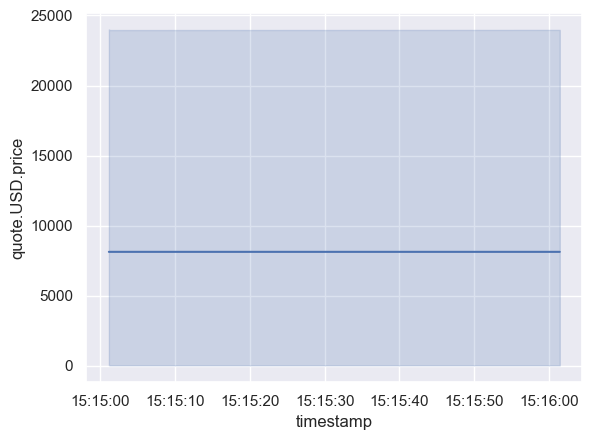

In [34]:
sns.set_theme(style='darkgrid')
sns.lineplot(x='timestamp', y='quote.USD.price', data=df9)